In [38]:
import pygad
import numpy as np


In [39]:
labirynth = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

max_moves = 30


In [40]:
gene_space = [0, 1, 2, 3]


In [41]:
def fitness_function(solution, solution_idx):
    def calculate_move(move, x, y, wrong):
        match move:
            case 0:
                if labirynth[x][y + 1]:
                    wrong += 1
                else:
                    y += 1
            case 1:
                if labirynth[x + 1][y]:
                    wrong += 1
                else:
                    x += 1
            case 2:
                if labirynth[x][y - 1]:
                    wrong += 1
                else:
                    y -= 1
            case _:
                if labirynth[x - 1][y]:
                    wrong += 1
                else:
                    x -= 1
        return x, y, wrong

    position_x = 1
    position_y = 1
    wrong_moves = 0

    for move in solution:
        position_x, position_y, wrong_moves = calculate_move(
            move, position_x, position_y, wrong_moves)

    distance_from_exit = abs(position_x - 10) + abs(position_y - 10)

    return -(distance_from_exit + wrong_moves)


In [42]:
sol_per_pop = 30
num_genes = 30


In [43]:
num_parents_mating = 15
num_generations = 50
keep_parents = 4


In [44]:
parent_selection_type = "sss"
crossover_type = "single_point"


In [45]:
mutation_type = "random"
mutation_percent_genes = 17


In [46]:
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes
)

ga_instance.run()


In [47]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))


Parameters of the best solution : [2. 0. 0. 2. 0. 3. 1. 3. 1. 0. 3. 0. 3. 0. 2. 0. 0. 0. 1. 1. 2. 2. 1. 3.
 2. 0. 0. 1. 0. 1.]
Fitness value of the best solution = -14


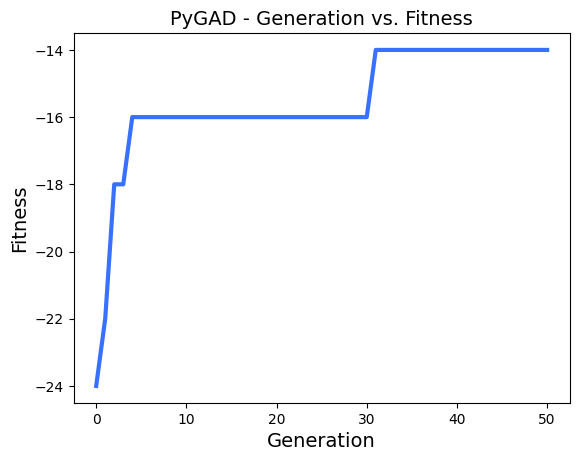

In [48]:
ga_instance.plot_fitness()
print()
